In [327]:
import requests
from bs4 import BeautifulSoup
import re
from matplotlib.cbook import flatten
from matplotlib import pyplot as plt

# Задание 1


Дано: [Сайт Библио-Глобуса](https://www.biblio-globus.ru)

Задание: средствами парсинга ответить на список вопросов ниже


1) Какова в среднем длина (в страницах) книги из категории классическая литература в ассортименте магазина?

2) Какое у этих книг распределение цен? (попробуйте нарисовать [гистограмму](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

3) Как соотносятся средние цены книг по Python, Машинному обучению и C++ ? (поясните, как именно вы доставали такие книги :), то есть "я буду доставать книги вот так, потому что...")


# Буду парсить сайт Читай-города

# Пункт 1

In [344]:
#Ссылка на классическую литературу
link = 'https://www.chitai-gorod.ru/catalog/books/klassicheskaya-proza-110003'
current_page = 1

'''
Создаю словарь, где ключ - номер страницы в разделе классическая литература, 
значение - список c количеством страниц у каждой книги на этой странице раздела.
Я не складываю всё в один список сразу, чтобы можно было остановить парсинг на какой-то странице
'''
numbers_of_pages = {i: [] for i in range(1, 254)}

#Из файла беру текущую информацию, если она там есть
with open('books.txt', 'r') as file:
    for i, stroke in enumerate(file):
        stroke = re.sub(r'[\[\],]', '', stroke)
        stroke = stroke.split()[2:]
        numbers_of_pages[i+1] = list(map(int, stroke))

In [345]:
#Тут я паршу 253 страницы раздела про классическую литературу
while current_page <= 253:
    temp_list = []
    text = requests.get(link + '?page=' + str(current_page)).text
    soup = BeautifulSoup(text, 'html')
    for article in soup.find_all('article'):
        book_link = 'https://www.chitai-gorod.ru' + article.find_all('a')[0]['href']
        book_page = requests.get(book_link)
        book_page = book_page.text
        soup_of_book_page = BeautifulSoup(book_page, 'html')
        temp = soup_of_book_page.find_all('span', {'itemprop':"numberOfPages"})
        if temp:
            count_of_pages = temp[0].get_text().strip()
            print(count_of_pages, end=' ')
            temp_list.append(int(count_of_pages))
    numbers_of_pages[current_page] = temp_list
    current_page += 1
    print()

320 336 1376 512 320 864 480 320 384 224 640 320 256 1394 512 672 416 384 288 288 416 224 544 512 512 448 960 640 320 256 576 672 256 864 832 416 880 288 704 992 320 512 320 672 320 736 224 
640 256 384 512 1088 576 224 352 768 352 256 512 704 224 288 320 480 640 304 672 352 992 448 704 352 320 640 448 688 1024 480 384 544 384 880 128 352 800 608 304 480 352 640 576 640 256 256 1131 
512 416 320 224 928 608 256 544 496 352 224 608 352 672 640 256 704 480 800 720 880 160 288 416 320 800 320 1328 608 1024 416 160 384 224 1536 320 288 864 448 1232 256 224 672 352 352 960 
480 256 384 1408 

KeyboardInterrupt: 

In [347]:
#Записываю в файл полученную информацию
with open('books.txt', 'w') as file:
    for key in numbers_of_pages:
        file.write(str(key) + ' page: ' + str(numbers_of_pages[key])+'\n')

In [349]:
#Делаю из словаря список и нахожу среднее количество страниц
lst = list(flatten(numbers_of_pages.values()))
print('Среднее количество страниц в кинге:', sum(lst)/len(lst))

Среднее количество страниц в кинге: 459.36669342609935


# Пункт 2

### Строю гистограмму

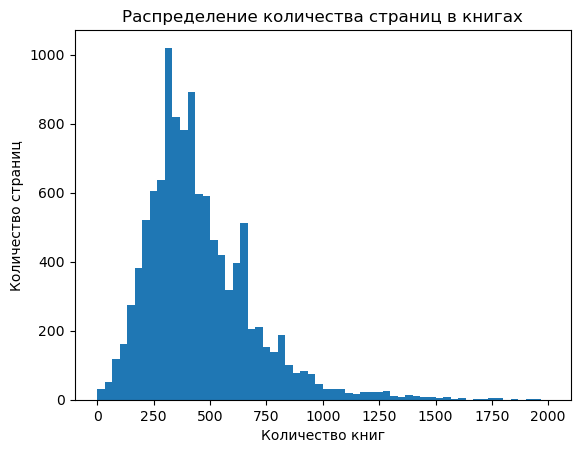

In [311]:
plt.hist(lst, bins=60, range=(0, 2000))
plt.xlabel("Количество книг")
plt.ylabel("Количество страниц")
plt.title("Распределение количества страниц в книгах")
plt.show()


## Похоже на нормальное распределение, впринципе, как и должно быть

# Пункт 3

## Я буду доставать книги, используя поиск самого сайта Читай-города и используя ссылку на первую страницу результата по нужному запросу. Это удобно, так как сам сайт ищет за нас нужную тематику.

In [317]:
#Функция для парсинга цен по ссылке по указанным первой и последней странице
def parce_the_prices(link, first_page, last_page):
    current_page = first_page
    lst_of_book_prices = []
    while current_page <= last_page:
        soup = BeautifulSoup(requests.get(link + str(current_page)).text, 'html')
        prices = soup.find_all('div', {'class':"product-price__old"})
        prices += soup.find_all('div', {'class':"product-price__value"})
        for price in prices:
            lst_of_book_prices.append(int(price.get_text().strip().replace('\xa0', '').split()[0]))
        current_page += 1   
    return lst_of_book_prices

### Стоимость книг по Питону

In [320]:
link_python = "https://www.chitai-gorod.ru/search?phrase=python&page="
list_of_python_book_prices = parce_the_prices(link_python, 1, 5)
print("Список цен за книги по Питону:")
print(list_of_python_book_prices)

Список цен за книги по Питону:
[849, 1099, 529, 749, 1349, 1199, 1249, 1599, 1249, 799, 1699, 2099, 1999, 879, 2099, 1349, 1249, 3799, 2099, 3999, 1599, 1699, 1249, 1149, 1199, 849, 2599, 2299, 1599, 1349, 1199, 1099, 2299, 4199, 3599, 1599, 2299, 1699, 1999, 1399, 679, 2699, 1899, 1149, 1799, 1999, 632, 1016, 369, 541, 1152, 861, 906, 1334, 894, 594, 1666, 1509, 1959, 615, 2030, 950, 939, 3766, 2030, 3009, 1169, 1596, 939, 1063, 1106, 629, 2527, 4099, 2233, 1169, 959, 839, 4699, 762, 2211, 3176, 2674, 800, 1671, 1252, 1431, 1006, 490, 2012, 1662, 954, 1572, 1925, 1099, 1299, 1249, 1449, 1199, 1699, 2099, 1699, 1349, 1799, 1799, 871, 1999, 1599, 1249, 871, 2199, 3499, 465, 1999, 2199, 1199, 2299, 1299, 2699, 1299, 2499, 2099, 1091, 871, 3799, 626, 3299, 1049, 2099, 1999, 3599, 912, 922, 898, 1396, 861, 1666, 2016, 1666, 984, 1342, 1735, 624, 1946, 1527, 894, 624, 2114, 3430, 320, 1946, 2086, 827, 1677, 1189, 2499, 2099, 2005, 920, 1837, 1565, 1349, 1399, 1999, 924, 399, 3099, 624, 1999

In [321]:
print('Средняя стоимость - ', sum(list_of_python_book_prices)/len(list_of_python_book_prices))

Средняя стоимость -  1805.9339207048458


### Стоимость книг по машинному обучению

In [322]:
link_machine_learning = 'https://www.chitai-gorod.ru/search?phrase=%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5%20%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5&page='
list_of_machine_learning_book_prices = parce_the_prices(link_machine_learning, 1, 2)
print("Список цен за книги по машинному обучению")
print(list_of_machine_learning_book_prices)


Список цен за книги по машинному обучению
[999, 1199, 2199, 1570, 1599, 3299, 1699, 3199, 1999, 1399, 3499, 2299, 2499, 3599, 3999, 2899, 1249, 2799, 2399, 834, 827, 3099, 1599, 1149, 1539, 2507, 2899, 4199, 1617, 1799, 1699, 2957, 3150, 1959, 1006, 3430, 1677, 1837, 2674, 3009, 2172, 1449, 6647, 3299, 902, 1799, 2699, 2786, 1754, 2899, 949, 2099]


In [323]:
print('Средняя стоимость - ', sum(list_of_machine_learning_book_prices)/len(list_of_machine_learning_book_prices))

Средняя стоимость -  2294.653846153846


### Стоимость книг по С++

In [324]:
link_c_plus_plus = 'https://www.chitai-gorod.ru/search?phrase=%D0%A1%2B%2B&page='
list_of_c_plus_plus_book_prices = parce_the_prices(link_c_plus_plus, 1, 3)
print("Список цен за книги по С++")
print(list_of_c_plus_plus_book_prices)

Список цен за книги по С++
[699, 1249, 3999, 1449, 1199, 929, 779, 979, 871, 4399, 871, 679, 1499, 2799, 1499, 929, 2899, 915, 871, 2699, 1199, 524, 894, 3009, 1399, 861, 768, 566, 717, 624, 3342, 624, 490, 1118, 2786, 1118, 5983, 1699, 465, 2172, 1599, 630, 979, 2499, 624, 2899, 2992, 2699, 2499, 4399, 1599, 2012, 836]


In [325]:
print('Средняя стоимость - ', sum(list_of_c_plus_plus_book_prices)/len(list_of_c_plus_plus_book_prices))

Средняя стоимость -  1676.1509433962265


## Книги по машинному обучению самые дорогие (думаю т.к. направление более узкоспециализированное, чем Python и C++. А также потому что направление относительно новое, и книг по нему ещё не так много). 
## Затем идёт Питон (дороже, чем C++. Думаю т.к. Питон более новое и очень популярное сейчас направление) 
## И самая маленькая средняя стоимость у книг по C++

# Задание 2 про перевод из camel_case'a в snake_case

Дано произвольное название, написанное в camelCase, перевести его в snake_case

In [72]:
import re
v = 'camelCaseVar'

v = re.sub(r'[A-Z]', lambda match: '_'+match[0].lower(), v)

print(v)

camel_case_var


## Задание 3, Про время 

Вовочка подготовил одно очень важное письмо, но везде указал неправильное время. 
Поэтому нужно заменить все вхождения времени на строку (TBD). Время — это строка вида HH:MM:SS или HH:MM, в которой HH — число от 00 до 23, а MM и SS — число от 00 до 59.

Ввод:

    Уважаемые! Если вы к 09:00 не вернёте 
    чемодан, то уже в 09:00:01 я за себя не отвечаю. 
    PS. С отношением 25:50 всё нормально!
    
Вывод:

    Уважаемые! Если вы к (TBD) не вернёте 
    чемодан, то уже в (TBD) я за себя не отвечаю. 
    PS. С отношением 25:50 всё нормально!

In [63]:
inp = """Уважаемые! Если вы к 09:00 не вернёте 
чемодан, то уже в 09:00:01 я за себя не отвечаю. 
PS. С отношением 25:50 всё нормально!"""

inp = re.sub(r"\s2[0-3]:[0-5]\d(:[0-5]\d)?\s", " (TMP) ", inp)
inp = re.sub(r"\s[0-1]\d:[0-5]\d(:[0-5]\d)?\s", " (TMP) ", inp)

print(inp)


Уважаемые! Если вы к (TMP) не вернёте 
чемодан, то уже в (TMP) я за себя не отвечаю. 
PS. С отношением 25:50 всё нормально!


# Задание 4 Про отчетность 

Владимиру потребовалось срочно запутать финансовую документацию. Но так, чтобы это было обратимо. 
Он не придумал ничего лучше, чем заменить каждое целое число (непрерывную последовательность цифр) на его куб. Помогите ему.

Ввод:

    Было закуплено 12 единиц техники 
    по 410.37 рублей.
    
Вывод:

    Было закуплено 1728 единиц техники 
    по 68921000.50653 рублей.

In [79]:
inp = "Было закуплено 12 единиц техники \nпо 410.37 рублей."
inp = re.sub(r"\d+", lambda match: str(int(match[0])**3), inp)
print(inp)

Было закуплено 1728 единиц техники 
по 68921000.50653 рублей.


# Задание 5. Про NumPy и SVD

[Почитать про SVD - 1](http://timbaumann.info/svd-image-compression-demo/)

Сожмите картинку во всех трех каналах с помощью SVD (R,G и B) и оцените, сколько нужно компонент, чтобы получилось вменяемое качество. А сколько мы при этом экономим места?

[Как жать все 3 канала](https://www.kaggle.com/code/paulbacher/practical-applications-to-svd-on-rgb-images/notebook)

In [245]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

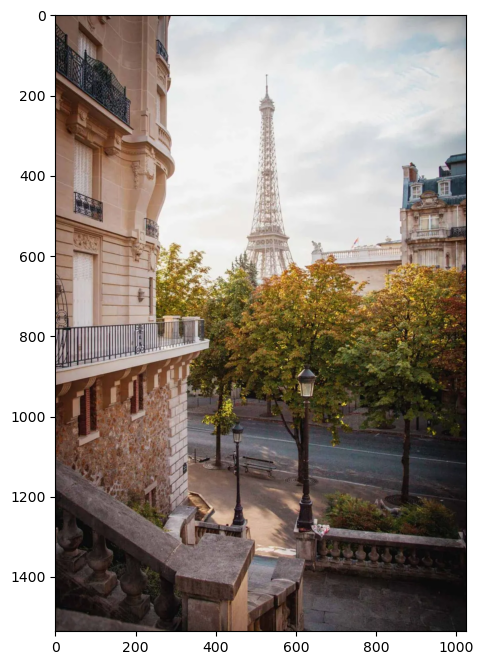

In [246]:
image = Image.open('Avenue-de-Camoens-Paris-Eiffel-Tower.png')
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.show()

In [247]:
#Функция для сжатия изображения до нужного порядка
def svd_compressor(image, order):
    """Returns the compressed image channel at the specified order"""
    
    # Create an array filled with zeros having the shape of the image
    compressed = np.zeros(image.shape)
    
    # Get the U, S and V terms (S = SIGMA)
    U, S, V = np.linalg.svd(image)
    
    # Loop over U columns (Ui), S diagonal terms (Si) and V rows (Vi) until the chosen order
    for i in range(order):
        Ui = U[:, i].reshape(-1, 1)
        Vi = V[i, :].reshape(1, -1)
        Si = S[i]
        compressed += (Ui * Si * Vi)
    
    return compressed

In [182]:
# Separation of the image channels
red_image = np.array(image)[:, :, 0]
green_image = np.array(image)[:, :, 1]
blue_image = np.array(image)[:, :, 2]

100%|█████████████████████████████████████████████| 8/8 [01:07<00:00,  8.48s/it]


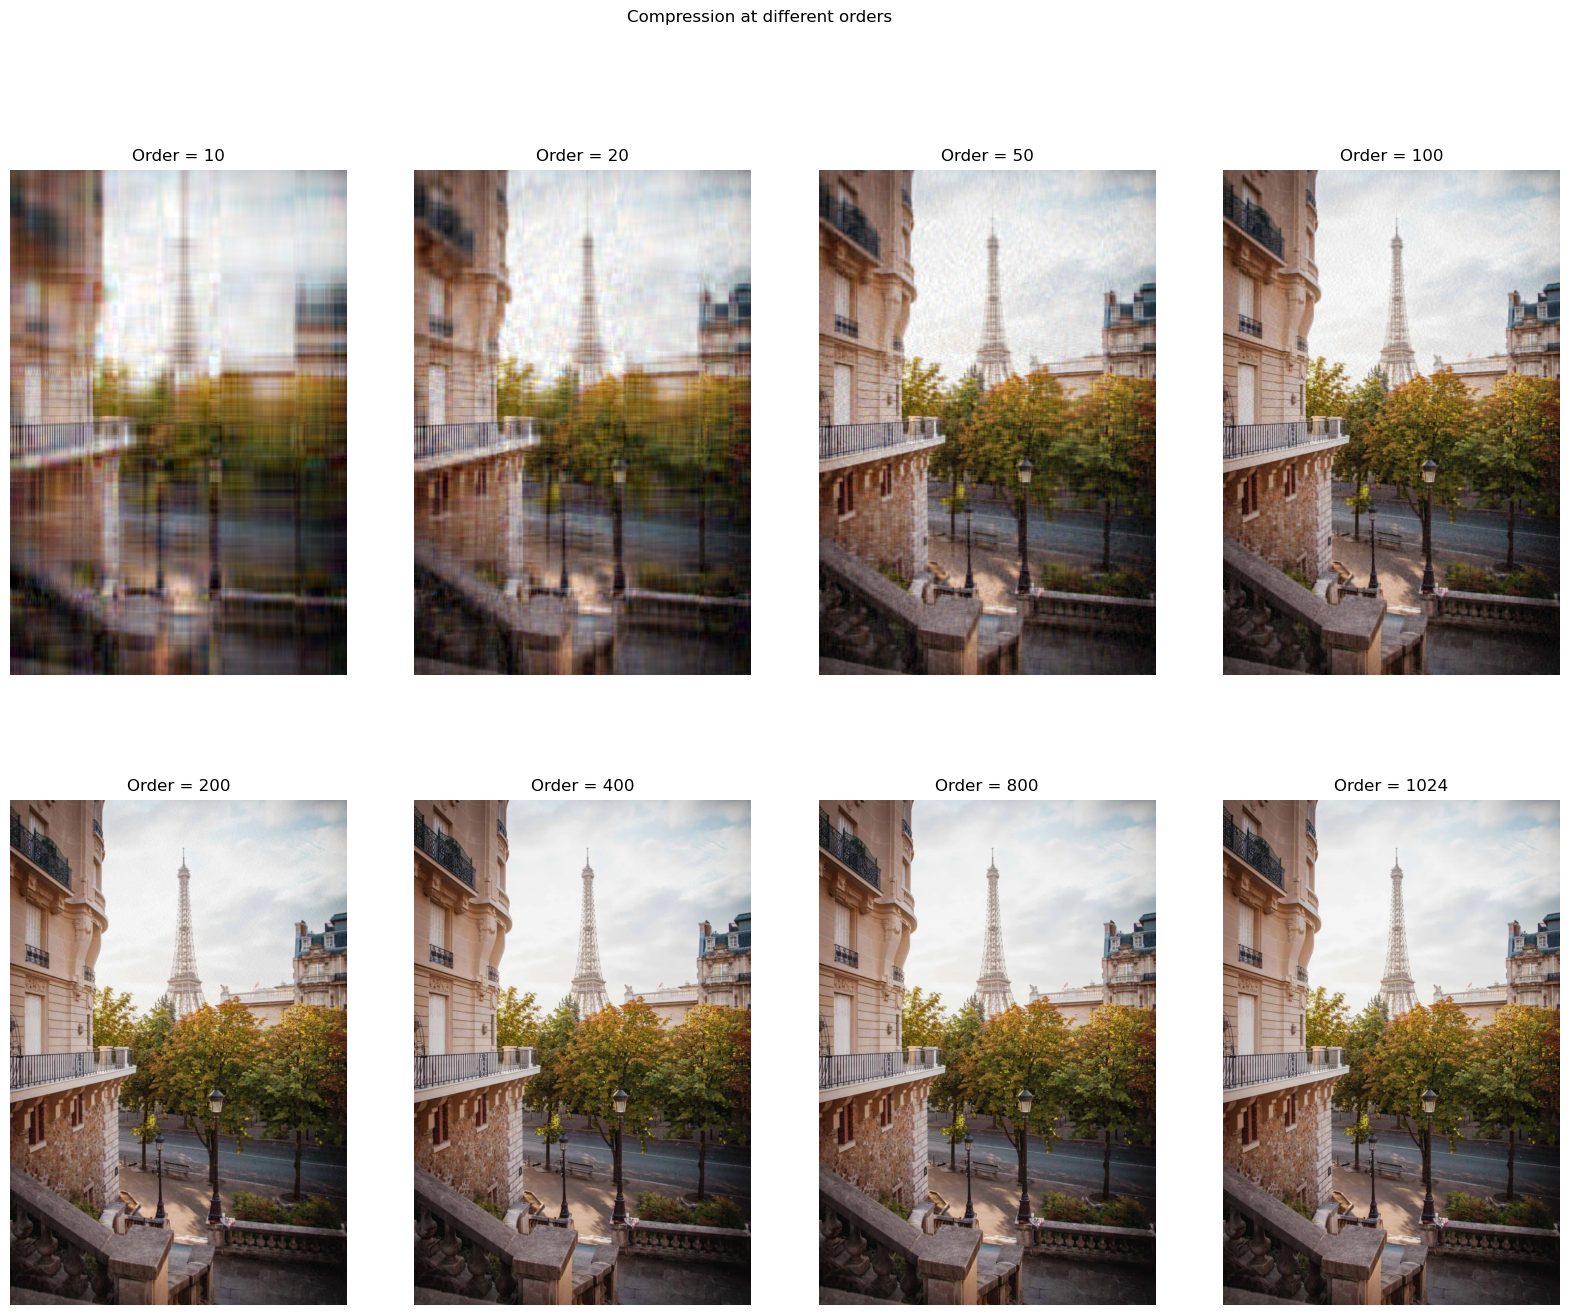

In [137]:
plt.figure(figsize=(20, 15))

orders = [10, 20, 50, 100, 200, 400, 800, 1024]

for i in tqdm(range(len(orders))):
    
    # Use the compressor function
    order = orders[i]
    red_comp = svd_compressor(red_image, order)
    green_comp = svd_compressor(green_image, order)
    blue_comp = svd_compressor(blue_image, order)
    
    # Combine images
    color_comp = np.zeros((np.array(image).shape[0], np.array(image).shape[1], 3))
    color_comp[:, :, 0] = red_comp
    color_comp[:, :, 1] = green_comp
    color_comp[:, :, 2] = blue_comp
    color_comp = np.around(color_comp).astype(int)
    
    # Display the compressed colored image in the subplot
    plt.subplot(2, 4, i + 1)
    plt.title("Order = {}".format(order))
    plt.axis('off')
    plt.imshow(color_comp)

plt.suptitle('Compression at different orders')
plt.show()

### Похоже, что уже при порядке 200 достигается приемлемое качество. Сравню картинки при order = 200 и при order = 1024

100%|█████████████████████████████████████████████| 2/2 [00:22<00:00, 11.28s/it]


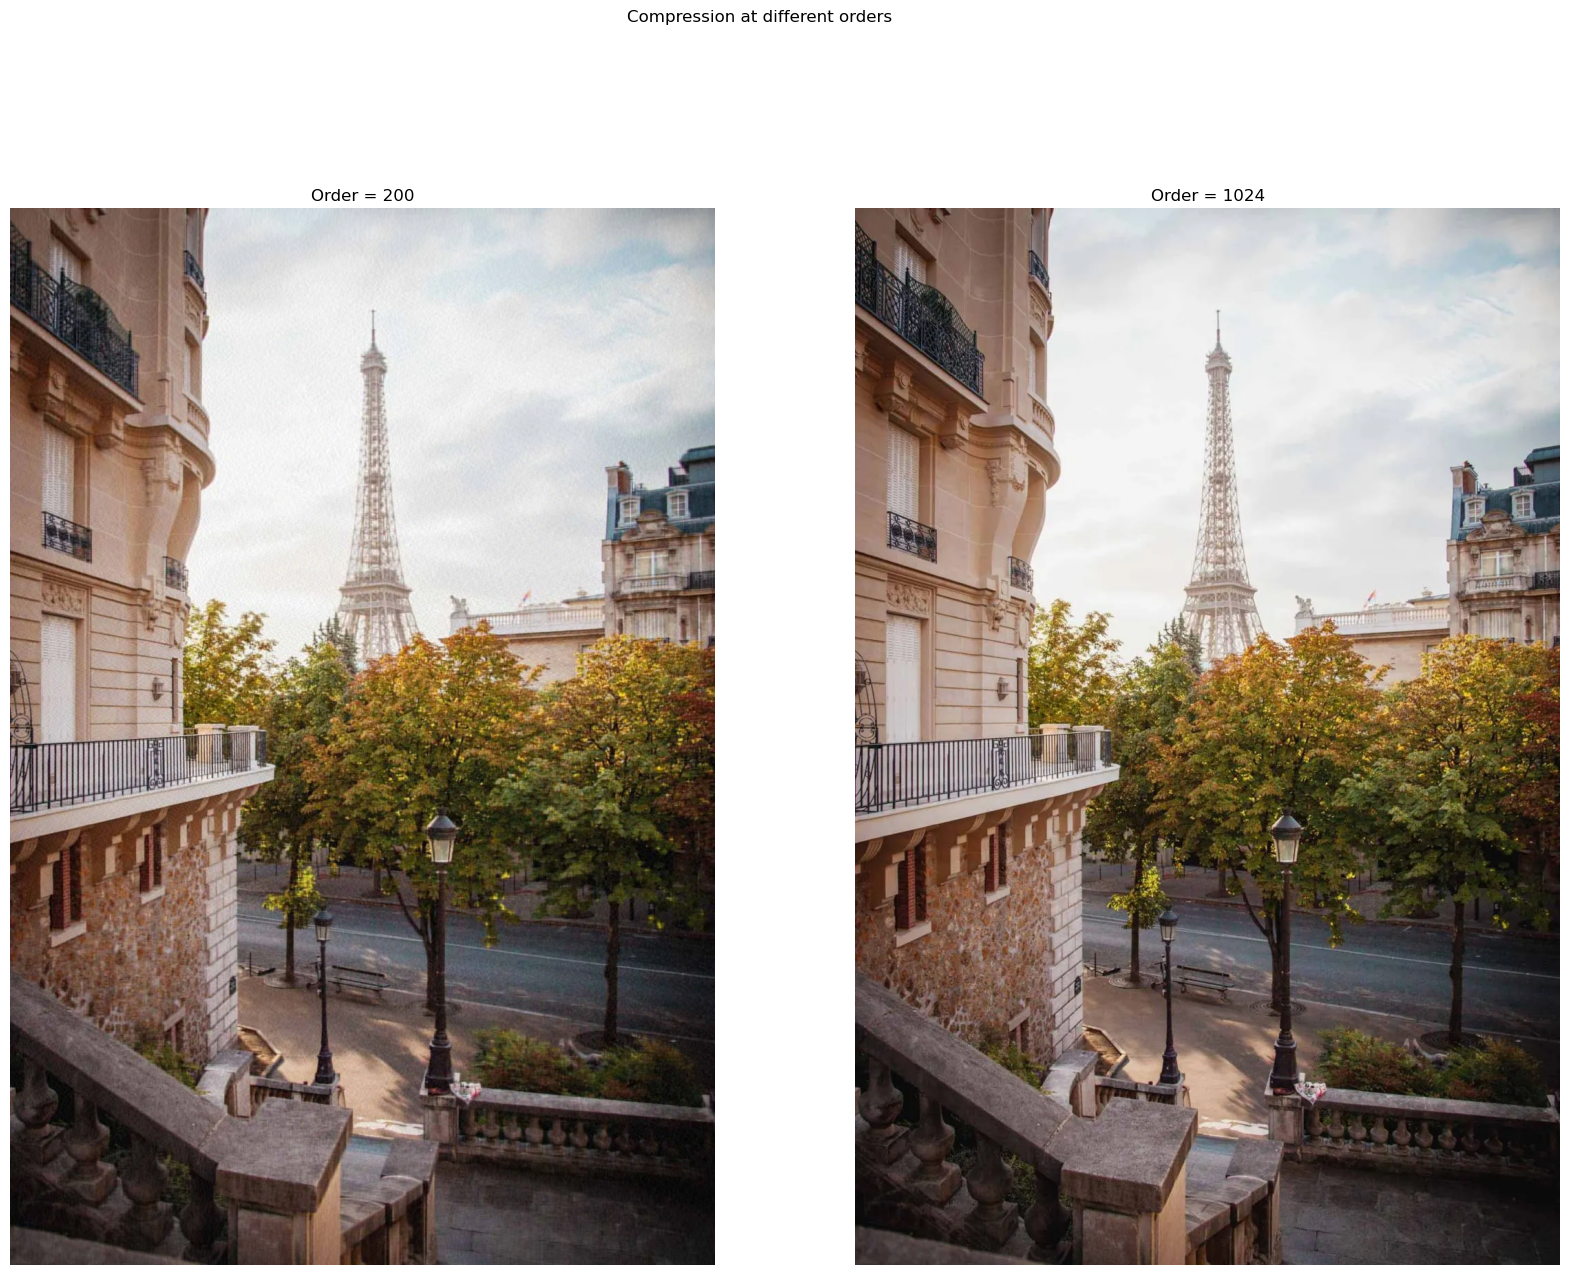

In [139]:
plt.figure(figsize=(20, 15))

orders = [200, 1024]

for i in tqdm(range(len(orders))):
    
    # Use the compressor function
    order = orders[i]
    red_comp = svd_compressor(red_image, order)
    green_comp = svd_compressor(green_image, order)
    blue_comp = svd_compressor(blue_image, order)
    
    # Combine images
    color_comp = np.zeros((np.array(image).shape[0], np.array(image).shape[1], 3))
    color_comp[:, :, 0] = red_comp
    color_comp[:, :, 1] = green_comp
    color_comp[:, :, 2] = blue_comp
    color_comp = np.around(color_comp).astype(int)
    
    # Display the compressed colored image in the subplot
    plt.subplot(1, 2, i + 1)
    plt.title("Order = {}".format(order))
    plt.axis('off')
    plt.imshow(color_comp)

plt.suptitle('Compression at different orders')
plt.show()

### Картинка слева совсем чуть-чуть теряет в качестве по сравнению с картинкой справа! При этом если изначальная картинка в одном цвете хранилась как матрица 1536 х 1024, то с сжатием при помощи SVD с порядком 200 мы будем хранить матрицы 1536 х 200, 200 х 1024 и плюс 200 сингулярных чисел. Сравним количество элементов

In [183]:
diff = 200*(1536 + 1 + 1024)/(1536*1024)
print(diff)

0.3256479899088542


### В данном случае мы добьёмся сжатия чуть больше, чем в 3 раза. Но это теоритические расчёты, проверим это на практике

In [495]:
# Separation of the image channels
red_image = np.array(image)[:, :, 0]
green_image = np.array(image)[:, :, 1]
blue_image = np.array(image)[:, :, 2]

order = 200
U, S, V = np.linalg.svd(green_image)

U = np.around(U[:,:order]).astype(np.uint8)
V = np.around(V[:order,:]).astype(np.uint8)
S = np.around(S[:order]).astype(np.uint8)

        
print(U.nbytes + V.nbytes + S.nbytes, "- столько байт весят матрицы при порядке 200 для одного цвета")

512200 - столько байт весят матрицы при порядке 200 для одного цвета


In [496]:
print(3*(U.nbytes + V.nbytes + S.nbytes), "- столько байт весят матрицы при порядке 200 для трёх цветов")

1536600 - столько байт весят матрицы при порядке 200 для трёх цветов


In [497]:
print(np.array(image).nbytes, "- столько байт весит изначальное изображение")

4718592 - столько байт весит изначальное изображение


In [498]:
print(3*(U.nbytes + V.nbytes + S.nbytes)/np.array(image).nbytes, 
      " - такую часть составляет размер сжатого изображения от изначального")

0.3256479899088542  - такую часть составляет размер сжатого изображения от изначального


### Ну то есть теоритические рассчёты подтвердились